# eCAVIAR updates
- April 2024 updates: 500 kb +/- GWAS index SNP, fixed flipepd REF/ALT

In [1]:
library(data.table)
library(tidyverse)
library(MetBrewer)
# library(VennDiagram)
library("RColorBrewer")
library(UpSetR)
library(patchwork)

── Attaching packages ──────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ─────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [2]:
coloc <- read.table("~/project-gandalm/GWAS-coloc/out/coloc_fetal_adult.tsv", header = T)
coloc_fetal <- coloc %>% filter(!QTL%in%c("MetaBrain_eqtl","thistle_sqtl"))
# write.table(coloc_fetal, "~/project-gandalm/GWAS-coloc/out/coloc_fetal.tsv", col.names = T, row.names = F,quote = F, sep = "\t")

In [2]:
res <- read.table("~/project-gandalm/GWAS-coloc/out/final_fetal_ecaviar_annot.tsv", header = T)

In [11]:
# # compare with adult results, SCZ+BIP, eQTL
# res[which(res$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3'&res$annot=='fetal_eqtl'),'locus'] %>% unique() %>% length()
# res[which(res$GWAS=='pgc-bip2021-all'&res$annot=='fetal_eqtl'),'locus'] %>% unique() %>% length()

In [39]:
res %>% filter(GeneSymbol == 'SP4')

SNP_ID,Prob_in_pCausalSet,CLPP,GWAS,locus,annot,feature,GWAS_loc_indexSNP_CHR,GWAS_loc_indexSNP_BP,GeneSymbol,GeneType,SNP_GWAS_BETA,SNP_GWAS_SE,SNP_GWAS_PVAL
<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
rs10276352,0.492813,0.0102173,PGC3_SCZ_wave3.european.autosome.public.v3,157,fetal_sqtl,7:21516925:21521542:clu_100938_NA,7,21474610,SP4,protein_coding,0.03189587,0.0087,2.414e-04
rs10276352,0.677070,0.0103681,PGC3_SCZ_wave3.european.autosome.public.v3,157,fetal_sqtl,7:21521300:21521542:clu_100938_NA,7,21474610,SP4,protein_coding,0.03189587,0.0087,2.414e-04
rs2282889,0.169006,0.0192281,pgc-bip2021-all,23,fetal_sqtl,7:21516925:21521120:clu_100938_NA,7,21492589,SP4,protein_coding,0.05589818,0.0095,3.391e-09
rs6954854,0.373683,0.0425146,pgc-bip2021-all,23,fetal_sqtl,7:21516925:21521120:clu_100938_NA,7,21492589,SP4,protein_coding,0.05829721,0.0094,5.936e-10
rs10276352,0.340402,0.0387281,pgc-bip2021-all,23,fetal_sqtl,7:21516925:21521120:clu_100938_NA,7,21492589,SP4,protein_coding,0.05420405,0.0094,8.452e-09
rs2282889,0.180112,0.0205236,pgc-bip2021-all,23,fetal_sqtl,7:21516925:21521542:clu_100938_NA,7,21492589,SP4,protein_coding,0.05589818,0.0095,3.391e-09
rs6954854,0.174179,0.0198475,pgc-bip2021-all,23,fetal_sqtl,7:21516925:21521542:clu_100938_NA,7,21492589,SP4,protein_coding,0.05829721,0.0094,5.936e-10
rs10276352,0.545709,0.0621828,pgc-bip2021-all,23,fetal_sqtl,7:21516925:21521542:clu_100938_NA,7,21492589,SP4,protein_coding,0.05420405,0.0094,8.452e-09
rs10276352,0.780546,0.0630670,pgc-bip2021-all,23,fetal_sqtl,7:21521300:21521542:clu_100938_NA,7,21492589,SP4,protein_coding,0.05420405,0.0094,8.452e-09


In [42]:
res %>% filter(GeneSymbol == 'SCN2A')

SNP_ID,Prob_in_pCausalSet,CLPP,GWAS,locus,annot,feature,GWAS_loc_indexSNP_CHR,GWAS_loc_indexSNP_BP,GeneSymbol,GeneType,SNP_GWAS_BETA,SNP_GWAS_SE,SNP_GWAS_PVAL
<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
rs17183814,0.998687,0.817848,pgc-bip2021-all,4,fetal_sqtl,2:166096150:166152390:clu_4944_NA,2,166152389,SCN2A,protein_coding,0.1028995,0.0185,2.678e-08


In [9]:
res %>% filter(GeneSymbol == 'GRM3')

SNP_ID,Prob_in_pCausalSet,CLPP,GWAS,locus,annot,feature,GWAS_loc_indexSNP_CHR,GWAS_loc_indexSNP_BP,GeneSymbol,GeneType,SNP_GWAS_BETA,SNP_GWAS_SE,SNP_GWAS_PVAL
<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
rs6943762,0.7892880,0.0557768,PGC3_SCZ_wave3.european.autosome.public.v3,15,fetal_eqtl,ENSG00000198822,7,86412221,GRM3,protein_coding,0.1050985,0.0132,1.569e-15
rs6943762,0.7495950,0.0802665,PGC3_SCZ_wave3.european.autosome.public.v3,15,fetal_isoqtl,ENST00000439827.1_2,7,86412221,GRM3,protein_coding,0.1050985,0.0132,1.569e-15
rs35274762,0.0996302,0.0106684,PGC3_SCZ_wave3.european.autosome.public.v3,15,fetal_isoqtl,ENST00000439827.1_2,7,86412221,GRM3,protein_coding,0.1046032,0.0132,2.658e-15
rs12704290,0.1261000,0.0135027,PGC3_SCZ_wave3.european.autosome.public.v3,15,fetal_isoqtl,ENST00000439827.1_2,7,86412221,GRM3,protein_coding,0.1049995,0.0135,7.603e-15


In [12]:
res %>% filter(GeneSymbol == 'IRF3') %>% arrange(desc(CLPP))

SNP_ID,Prob_in_pCausalSet,CLPP,GWAS,locus,annot,feature,GWAS_loc_indexSNP_CHR,GWAS_loc_indexSNP_BP,GeneSymbol,GeneType,SNP_GWAS_BETA,SNP_GWAS_SE,SNP_GWAS_PVAL
<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
rs2082481,0.510263,0.0553404,PGC3_SCZ_wave3.european.autosome.public.v3,61,fetal_sqtl,19:50168103:50168929:clu_54156_NA,19,50162909,IRF3,protein_coding,0.06669557,0.0102,5.879e-11
rs7508148,0.469802,0.0509522,PGC3_SCZ_wave3.european.autosome.public.v3,61,fetal_sqtl,19:50168103:50168929:clu_54156_NA,19,50162909,IRF3,protein_coding,0.06590009,0.0102,9.395e-11
rs2082481,0.551354,0.0350710,PGC3_SCZ_wave3.european.autosome.public.v3,61,fetal_tri1_sqtl,19:50168103:50168929:clu_54156_NA,19,50162909,IRF3,protein_coding,0.06669557,0.0102,5.879e-11
rs7508148,0.395586,0.0317137,PGC3_SCZ_wave3.european.autosome.public.v3,61,fetal_sqtl,19:50168103:50168892:clu_54156_NA,19,50162909,IRF3,protein_coding,0.06590009,0.0102,9.395e-11
rs7508148,0.418306,0.0266080,PGC3_SCZ_wave3.european.autosome.public.v3,61,fetal_tri1_sqtl,19:50168103:50168929:clu_54156_NA,19,50162909,IRF3,protein_coding,0.06590009,0.0102,9.395e-11
rs2082481,0.330556,0.0265003,PGC3_SCZ_wave3.european.autosome.public.v3,61,fetal_sqtl,19:50168103:50168892:clu_54156_NA,19,50162909,IRF3,protein_coding,0.06669557,0.0102,5.879e-11
rs1140375,0.151411,0.0121385,PGC3_SCZ_wave3.european.autosome.public.v3,61,fetal_sqtl,19:50168103:50168892:clu_54156_NA,19,50162909,IRF3,protein_coding,0.06459789,0.0102,2.683e-10


In [13]:
res %>% filter(GeneSymbol == 'NRDC')

SNP_ID,Prob_in_pCausalSet,CLPP,GWAS,locus,annot,feature,GWAS_loc_indexSNP_CHR,GWAS_loc_indexSNP_BP,GeneSymbol,GeneType,SNP_GWAS_BETA,SNP_GWAS_SE,SNP_GWAS_PVAL
<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
rs11205897,0.946029,0.1582560,MDD.Howard.PGC.2019,31,fetal_tri1_sqtl,1:52289458:52293468:clu_11129_NA,1,52342427,NRDC,protein_coding,0.0249,0.0043,7.440e-09
rs11205896,0.254693,0.0250284,MDD.Howard.PGC.2019,31,fetal_sqtl,1:52289458:52293468:clu_11129_NA,1,52342427,NRDC,protein_coding,-0.0237,0.0043,3.818e-08
rs11205897,0.725249,0.0712693,MDD.Howard.PGC.2019,31,fetal_sqtl,1:52289458:52293468:clu_11129_NA,1,52342427,NRDC,protein_coding,0.0249,0.0043,7.440e-09


### main fig5A, GWAS loci from eCAVIAR and COLOC, 500kb

In [7]:
# total number of colocalized loci by two methods
df <- data.frame()
n <- 1
for(i in unique(res$GWAS)) {
        df[n,'GWAS'] <- i
        df[n,'loci'] <- c(res[which(res$GWAS==i),'locus'],
                         coloc_fetal[which(coloc_fetal$GWAS==i),'loc']) %>% unique() %>% length()
        n <- n+1
    
}
df

,GWAS,loci
,<chr>,<int>
1,PGC3_SCZ_wave3.european.autosome.public.v3,196
2,pgc-bip2021-all,40
3,ASD.iPSYCHPGC.2018,2
4,ADHD.Demontis.2019,4
5,MDD.Howard.PGC.2019,51


In [10]:
(196+40+2+4+51)/485
196+40+2+4+51

[1] 0.6041237

[1] 293

**supp figure UpsetR**

In [33]:
table(coloc$QTL)


       fetal_eqtl      fetal_isoqtl        fetal_sqtl   fetal_tri1_eqtl 
              209               535               698               103 
fetal_tri1_isoqtl   fetal_tri1_sqtl   fetal_tri2_eqtl fetal_tri2_isoqtl 
              267               314                68               122 
  fetal_tri2_sqtl    MetaBrain_eqtl      thistle_sqtl 
              137               213               750 

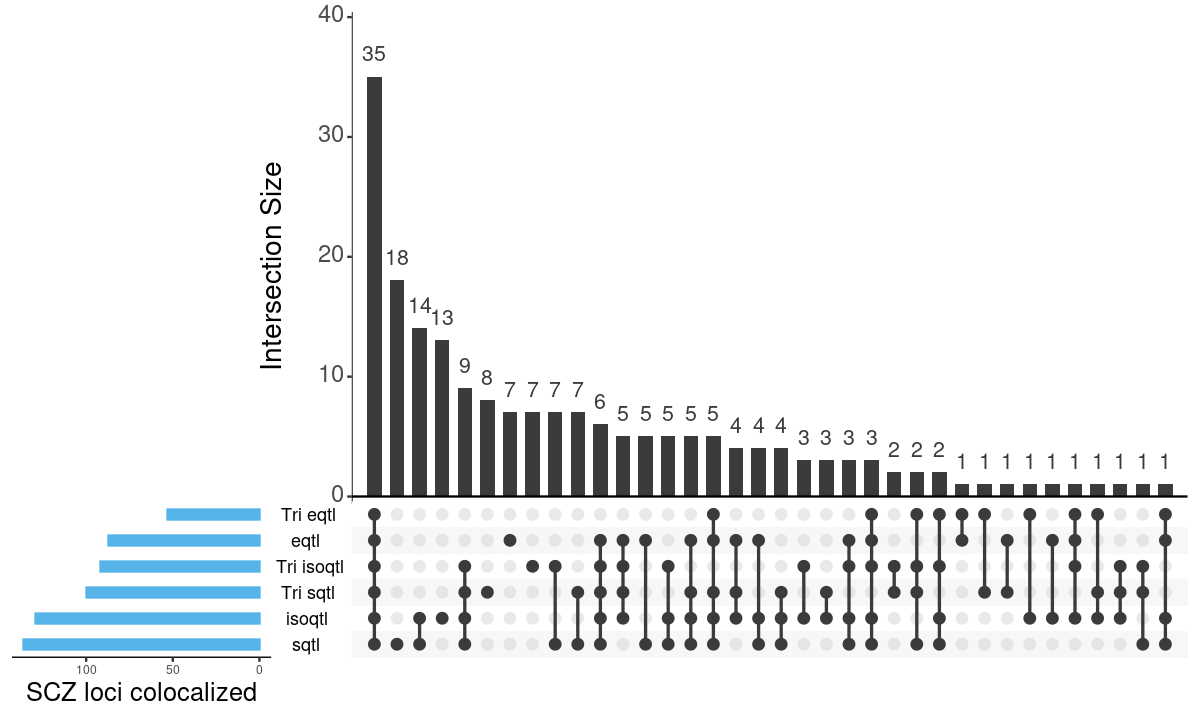

In [5]:
# SCZ upsetR plot for supplemental
df <- list('eqtl' = unique(c(res[which(res$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & res$annot=='fetal_eqtl'),'locus'],
                         coloc_fetal[which(coloc_fetal$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & coloc_fetal$QTL=='fetal_eqtl'),'loc'])),
           'isoqtl' = unique(c(res[which(res$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & res$annot=='fetal_isoqtl'),'locus'],
                         coloc_fetal[which(coloc_fetal$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & coloc_fetal$QTL=='fetal_isoqtl'),'loc'])),
           'sqtl' = unique(c(res[which(res$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & res$annot=='fetal_sqtl'),'locus'],
                         coloc_fetal[which(coloc_fetal$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & coloc_fetal$QTL=='fetal_sqtl'),'loc'])),
           'Tri eqtl' = unique(c(res[which(res$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & res$annot%in%c('fetal_tri1_eqtl', 'fetal_tri2_eqtl')),'locus'],
                         coloc_fetal[which(coloc_fetal$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & coloc_fetal$QTL%in%c('fetal_tri1_eqtl', 'fetal_tri2_eqtl')),'loc'])),
           'Tri isoqtl' = unique(c(res[which(res$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & res$annot%in%c('fetal_tri1_isoqtl', 'fetal_tri2_isoqtl')),'locus'],
                         coloc_fetal[which(coloc_fetal$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & coloc_fetal$QTL%in%c('fetal_tri1_isoqtl', 'fetal_tri2_isoqtl')),'loc'])),
           
           'Tri sqtl' = unique(c(res[which(res$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & res$annot%in%c('fetal_tri1_sqtl', 'fetal_tri2_sqtl')),'locus'],
                         coloc_fetal[which(coloc_fetal$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3' & coloc_fetal$QTL%in%c('fetal_tri1_sqtl', 'fetal_tri2_sqtl')),'loc']))
           
           )
options(repr.plot.height = 6, repr.plot.width = 10)
upset(fromList(df), order.by = "freq",
      sets.bar.color = "#56B4E9",
      sets.x.label = "SCZ loci colocalized",
      point.size = 3,
      nsets = 7,
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))

In [7]:
pdf(file = "~/project-gandalm/isoform_twas/colocal/figures/upsetr_v2.pdf", onefile = F, width = 10, height = 6)

# options(repr.plot.height = 8, repr.plot.width = 11)
upset(fromList(df), order.by = "freq",
      sets.bar.color = "#56B4E9",
      sets.x.label = "SCZ loci colocalized",
      point.size = 3,
      nsets = 7,
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))
dev.off()

png 
  2

In [7]:
df <- data.frame()
n <- 1
for(i in unique(res$GWAS)) {
    for(j in unique(res$annot)) {
        df[n,'annot'] <- j 
        df[n,'GWAS'] <- i
        df[n,'loci'] <- c(res[which(res$GWAS==i & res$annot==j),'locus'],
                         coloc_fetal[which(coloc_fetal$GWAS==i&coloc_fetal$QTL==j),'loc']) %>% unique() %>% length()
        n <- n+1
    }
}

In [8]:
df1 <- data.frame('annot'=rep('GWAS',5), 'GWAS'=unique(res$GWAS), 'loci'=c(307, 63, 3, 11, 101))
df <- rbind(df1, df)
df

annot,GWAS,loci
<chr>,<chr>,<dbl>
GWAS,PGC3_SCZ_wave3.european.autosome.public.v3,307
GWAS,pgc-bip2021-all,63
GWAS,ASD.iPSYCHPGC.2018,3
GWAS,ADHD.Demontis.2019,11
GWAS,MDD.Howard.PGC.2019,101
fetal_tri1_sqtl,PGC3_SCZ_wave3.european.autosome.public.v3,88
fetal_tri1_isoqtl,PGC3_SCZ_wave3.european.autosome.public.v3,85
fetal_tri2_sqtl,PGC3_SCZ_wave3.european.autosome.public.v3,52
fetal_tri1_eqtl,PGC3_SCZ_wave3.european.autosome.public.v3,49


In [9]:
df[which(df$GWAS=='PGC3_SCZ_wave3.european.autosome.public.v3'),'GWAS'] <- 'SCZ'
df[which(df$GWAS=='pgc-bip2021-all'),'GWAS'] <- 'BIP'
df[which(df$GWAS=='ASD.iPSYCHPGC.2018'),'GWAS'] <- 'ASD'
df[which(df$GWAS=='ADHD.Demontis.2019'),'GWAS'] <- 'ADHD'
df[which(df$GWAS=='MDD.Howard.PGC.2019'),'GWAS'] <- 'MDD'

In [28]:
# df

In [10]:
df$annot <- factor(df$annot, levels = rev(c("GWAS", "fetal_eqtl", "fetal_isoqtl", "fetal_sqtl", 
                                 "fetal_tri1_eqtl", "fetal_tri2_eqtl",
                                 "fetal_tri1_isoqtl", "fetal_tri2_isoqtl",
                                 "fetal_tri1_sqtl", "fetal_tri2_sqtl")))
df$GWAS <- factor(df$GWAS, levels = c("SCZ", "MDD", "BIP", "ADHD", "ASD"))

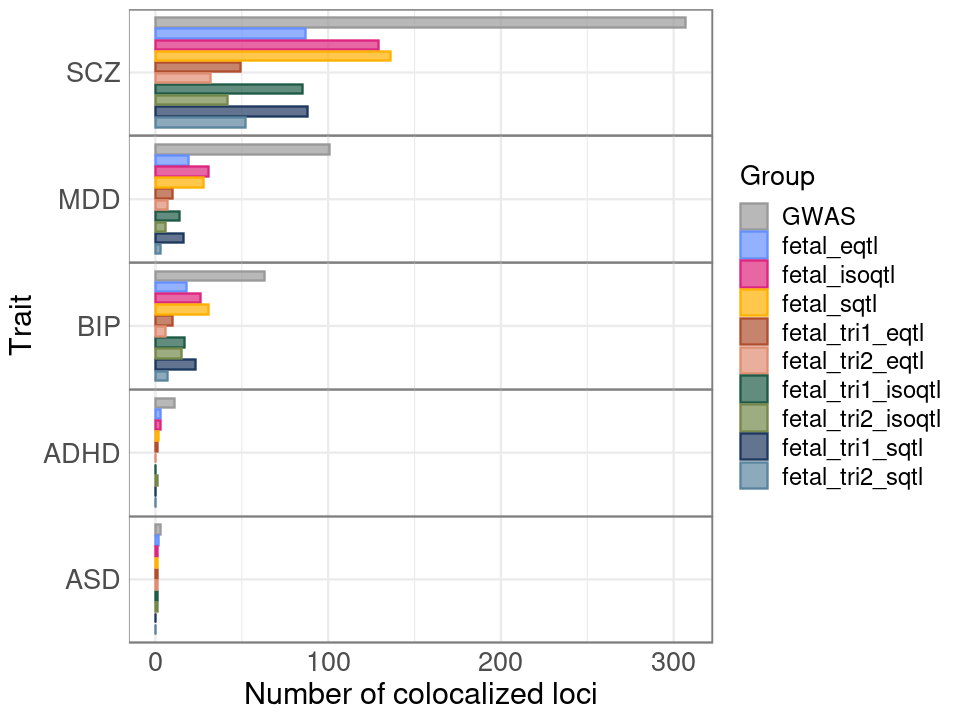

In [30]:
options(repr.plot.height = 6, repr.plot.width = 8)

p1 <- ggplot(df, aes(y = GWAS, x = loci, fill = annot, color = annot)) +
#     geom_bar(position = "stack", stat = "identity", color = "black", alpha = ifelse(df$group == "GWAS", 0.3, 1)) +
    geom_bar(stat = "identity", alpha = 0.7, position = position_dodge(width = 1.05)) +
    facet_grid(GWAS ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "Number of colocalized loci", y = "Trait") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_blank(),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
#     scale_fill_manual(values = c("grey", met.brewer("Tam", 7)), name = "Group")
#      scale_fill_manual(values = c("grey", "#CC79A7", "#56B4E9", "#009E73","#F0E442","#FFB000", "#DC267F", "#648FFF"), name = "Group")
    scale_fill_manual(values = c(met.brewer("Redon", 6), "#FFB000", "#DC267F", "#648FFF", "#999999"), name = "Group") +
    scale_color_manual(values = c(met.brewer("Redon", 6), "#FFB000", "#DC267F", "#648FFF", "#999999"), name = "Group") +
    guides(fill = guide_legend(reverse = TRUE)) +
    guides(color = guide_legend(reverse = TRUE))
p1

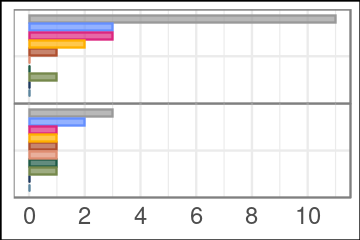

In [31]:
options(repr.plot.height = 2, repr.plot.width = 3)

p2 <- ggplot(df %>% filter(GWAS %in% c("ADHD", "ASD")), 
                     aes(y = GWAS, x = loci, fill = annot, color = annot)) +
#     geom_bar(position = "stack", stat = "identity", color = "black", alpha = ifelse(df$group == "GWAS", 0.3, 1)) +
    geom_bar(stat = "identity", alpha = 0.7, position = position_dodge(width = 1.05)) +
    facet_grid(GWAS ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "Number of colocalized loci", y = "Trait") +
    theme(axis.text.x = element_text(size = 14),
          axis.text.y = element_blank(),
          axis.title = element_blank(),
          legend.position = "none",
          strip.text.y = element_blank(),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA),
          plot.background = element_rect(fill = "white")) +
#     scale_fill_manual(values = c("grey", met.brewer("Tam", 7)), name = "Group")
#      scale_fill_manual(values = c("grey", "#CC79A7", "#56B4E9", "#009E73","#F0E442","#FFB000", "#DC267F", "#648FFF"), name = "Group")
    scale_fill_manual(values = c(met.brewer("Redon", 6), "#FFB000", "#DC267F", "#648FFF", "#999999"), name = "Group") +
    scale_color_manual(values = c(met.brewer("Redon", 6), "#FFB000", "#DC267F", "#648FFF", "#999999"), name = "Group") +
    guides(fill = guide_legend(reverse = TRUE)) +
    guides(color = guide_legend(reverse = TRUE)) +
    scale_x_continuous(breaks = c(0, 2, 4, 6, 8, 10))
#     scale_y_discrete(breaks = NULL)
p2

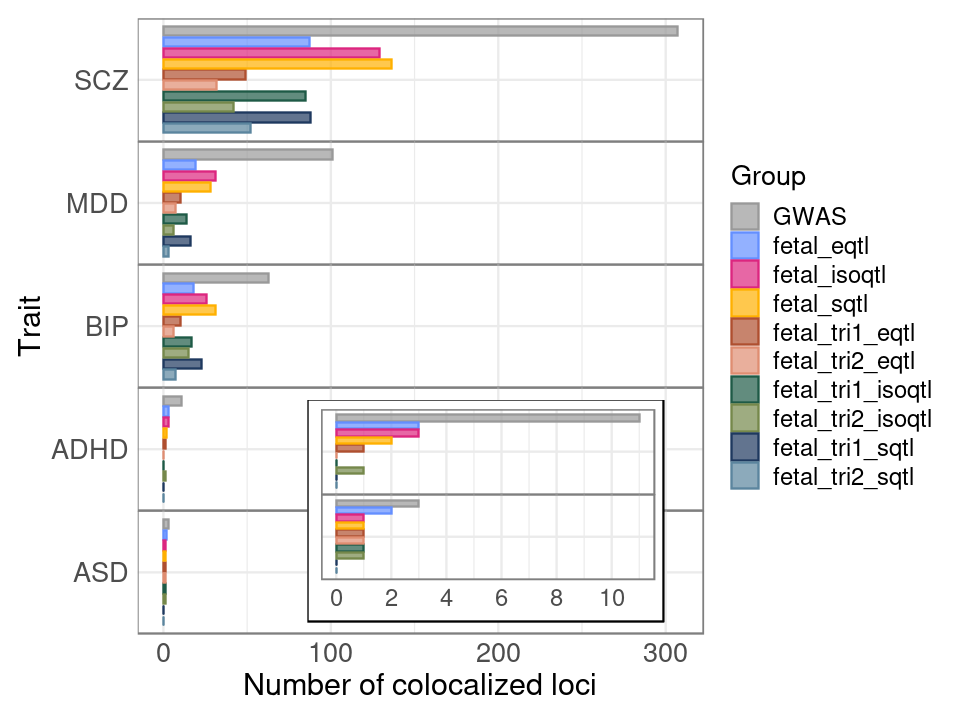

In [32]:
options(repr.plot.height = 6, repr.plot.width = 8)

p1 + inset_element(p2, left = 0.3, bottom = 0.02, right = 0.93, top = 0.38)

In [33]:
ggsave("~/project-gandalm/isoform_twas/colocal/figures/coloc_v5_500kb_coloc_ecaviar.pdf", height = 6, width = 8)

### main fig5B, supp figures: 500kb eCAVIAR, GWAS PVAL<5e-8, protein_coding genes

In [3]:
res_filter <- res %>% filter(GeneType=='protein_coding', SNP_GWAS_PVAL<5e-8)

In [36]:
df <- res_filter %>% 
    filter(GWAS == 'PGC3_SCZ_wave3.european.autosome.public.v3') %>% 
    unite("Gene_SNP", GeneSymbol, SNP_ID, sep = "_", remove = FALSE)
scz_table <- read.table("~/project-gandalm/GWAS-coloc/code/PGC3_SCZ_wave3.european.autosome.public.v3_loci.tsv",header = T)
# dim(df)
df <- df %>% inner_join(scz_table, by = "locus")
# dim(df)
df <- df %>% arrange(desc(CLPP))
df <- df[!duplicated(df$Gene_SNP),]
df_top50 <- df[1:50,]

In [5]:
colors <- c("eQTL" = "#648FFF", "isoQTL" = "#DC267F", "sQTL" = "#FFB000" ,
            "Tri2_sQTL" = met.brewer("Redon", 6)[1], "Tri1_sQTL" = met.brewer("Redon", 6)[2],
            "Tri2_isoQTL" = met.brewer("Redon", 6)[3], "Tri1_isoQTL" = met.brewer("Redon", 6)[4],
            "Tri2_eQTL" = met.brewer("Redon", 6)[5], "Tri1_eQTL" = met.brewer("Redon", 6)[6])
# options(repr.plot.height = 12, repr.plot.width = 8)

In [37]:
table(df_top50$annot)


       fetal_eqtl      fetal_isoqtl        fetal_sqtl   fetal_tri1_eqtl 
                6                18                12                 1 
fetal_tri1_isoqtl   fetal_tri1_sqtl fetal_tri2_isoqtl   fetal_tri2_sqtl 
                3                 6                 2                 2 

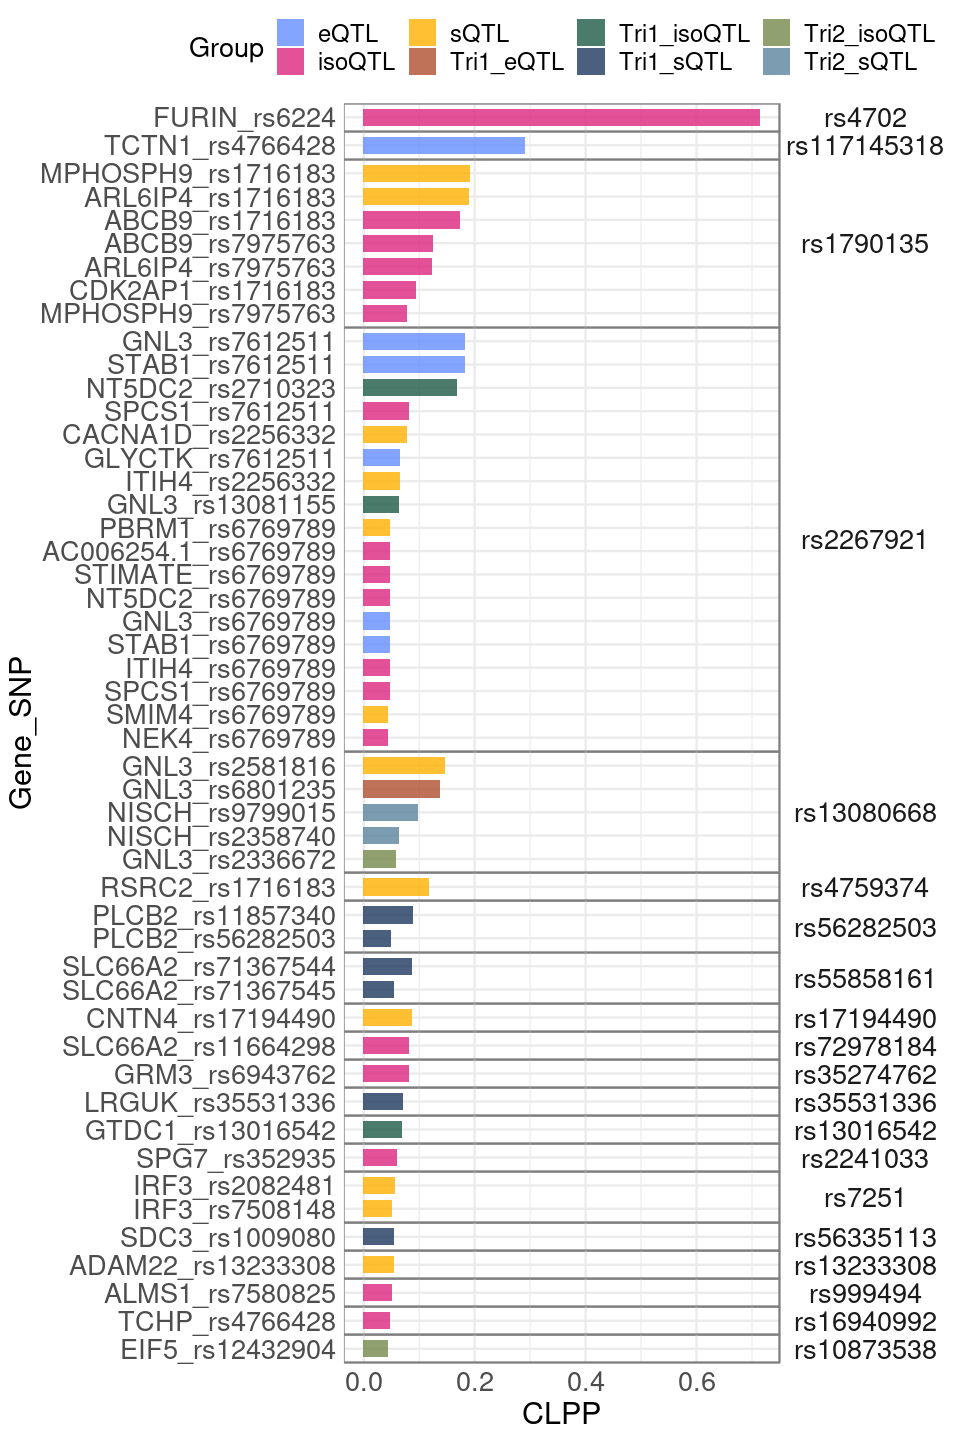

In [47]:
df_order <- df_top50 %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)
df_order <- df_order %>% mutate(SNP = factor(SNP, levels = unique(SNP)))
df_order$SNP <- fct_rev(df_order$SNP)
# df_order$Gene_SNP
# df_order$locus

df_order[which(df_order$annot == 'fetal_eqtl'),'annot'] <- 'eQTL'
df_order[which(df_order$annot == 'fetal_isoqtl'),'annot'] <- 'isoQTL'
df_order[which(df_order$annot == 'fetal_sqtl'),'annot'] <- 'sQTL'
df_order[which(df_order$annot == 'fetal_tri1_eqtl'),'annot'] <- 'Tri1_eQTL'
df_order[which(df_order$annot == 'fetal_tri1_isoqtl'),'annot'] <- 'Tri1_isoQTL'
df_order[which(df_order$annot == 'fetal_tri1_sqtl'),'annot'] <- 'Tri1_sQTL'
df_order[which(df_order$annot == 'fetal_tri2_eqtl'),'annot'] <- 'Tri2_eQTL'
df_order[which(df_order$annot == 'fetal_tri2_isoqtl'),'annot'] <- 'Tri2_isoQTL'
df_order[which(df_order$annot == 'fetal_tri2_sqtl'),'annot'] <- 'Tri2_sQTL'

ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = annot)) +
    geom_bar(stat = "identity", alpha = 0.8, width = 0.7) +
    facet_grid(SNP ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "top",
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = colors, name = "Group")

**Plot fetal xQTL only, no trimester**

In [4]:
res_subset <- res_filter%>%filter(annot %in% c("fetal_eqtl", "fetal_isoqtl", "fetal_sqtl"))

In [49]:
df <- res_subset %>% 
    filter(GWAS == 'PGC3_SCZ_wave3.european.autosome.public.v3') %>% 
    unite("Gene_SNP", GeneSymbol, SNP_ID, sep = "_", remove = FALSE)
scz_table <- read.table("~/project-gandalm/GWAS-coloc/code/PGC3_SCZ_wave3.european.autosome.public.v3_loci.tsv",header = T)
dim(df)
df <- df %>% inner_join(scz_table, by = "locus")
dim(df)
df <- df %>% arrange(desc(CLPP))
df <- df[!duplicated(df$Gene_SNP),]
df_top50 <- df[1:50,]

[1] 363  15

[1] 363  19

In [50]:
# colors <- c("eQTL" = "#648FFF", "isoQTL" = "#DC267F", "sQTL" = "#FFB000")
options(repr.plot.height = 12, repr.plot.width = 7)

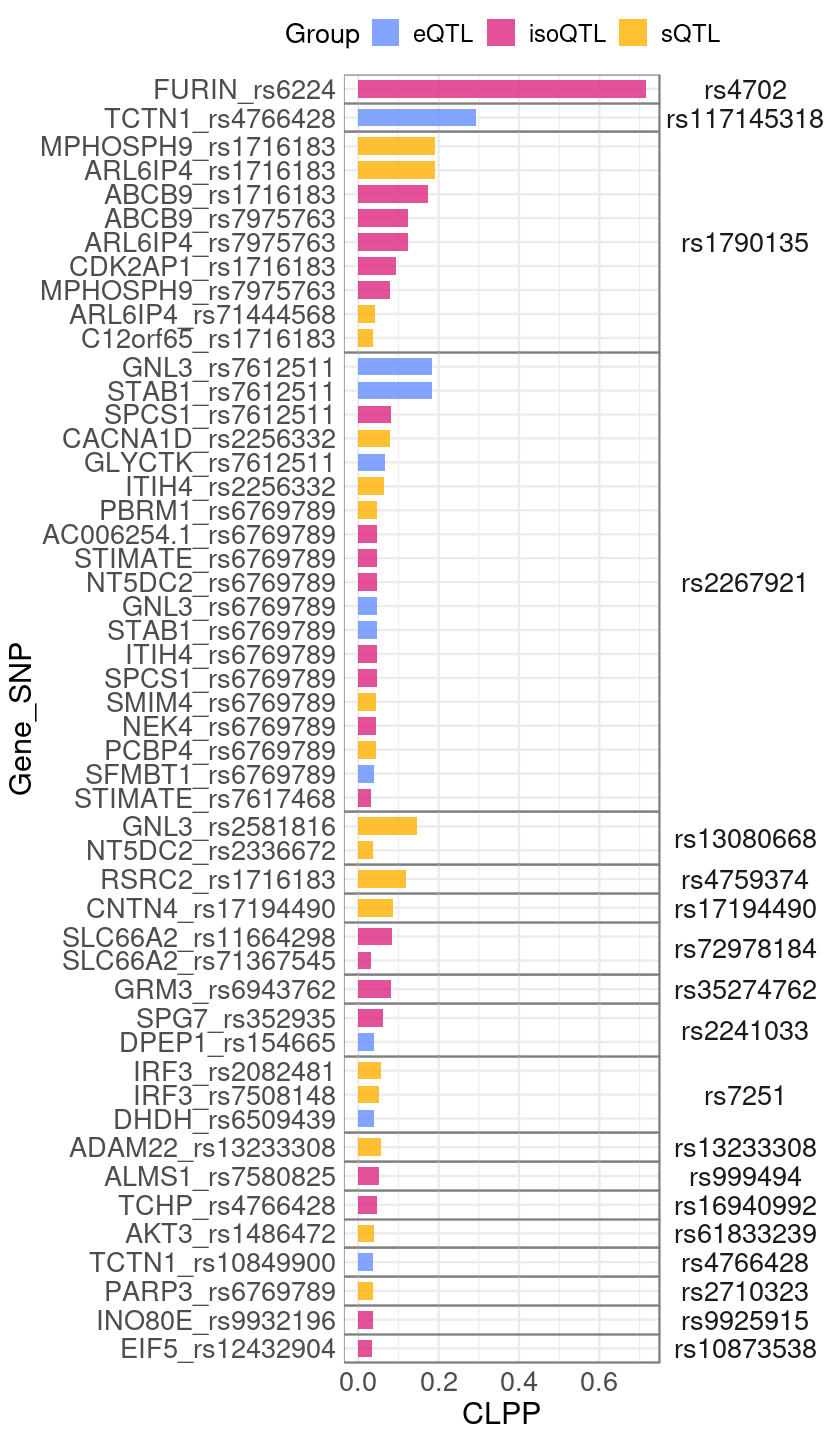

In [51]:
df_order <- df_top50 %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)
df_order <- df_order %>% mutate(SNP = factor(SNP, levels = unique(SNP)))
df_order$SNP <- fct_rev(df_order$SNP)
# df_order$Gene_SNP
# df_order$locus

df_order[which(df_order$annot == 'fetal_eqtl'),'annot'] <- 'eQTL'
df_order[which(df_order$annot == 'fetal_isoqtl'),'annot'] <- 'isoQTL'
df_order[which(df_order$annot == 'fetal_sqtl'),'annot'] <- 'sQTL'

ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = annot)) +
    geom_bar(stat = "identity", alpha = 0.8, width = 0.7) +
    facet_grid(SNP ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "top",
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = colors, name = "Group")

In [52]:
ggsave("~/project-gandalm/isoform_twas/colocal/figures/CLPP_SCZ_v2.pdf", height = 12, width = 7)

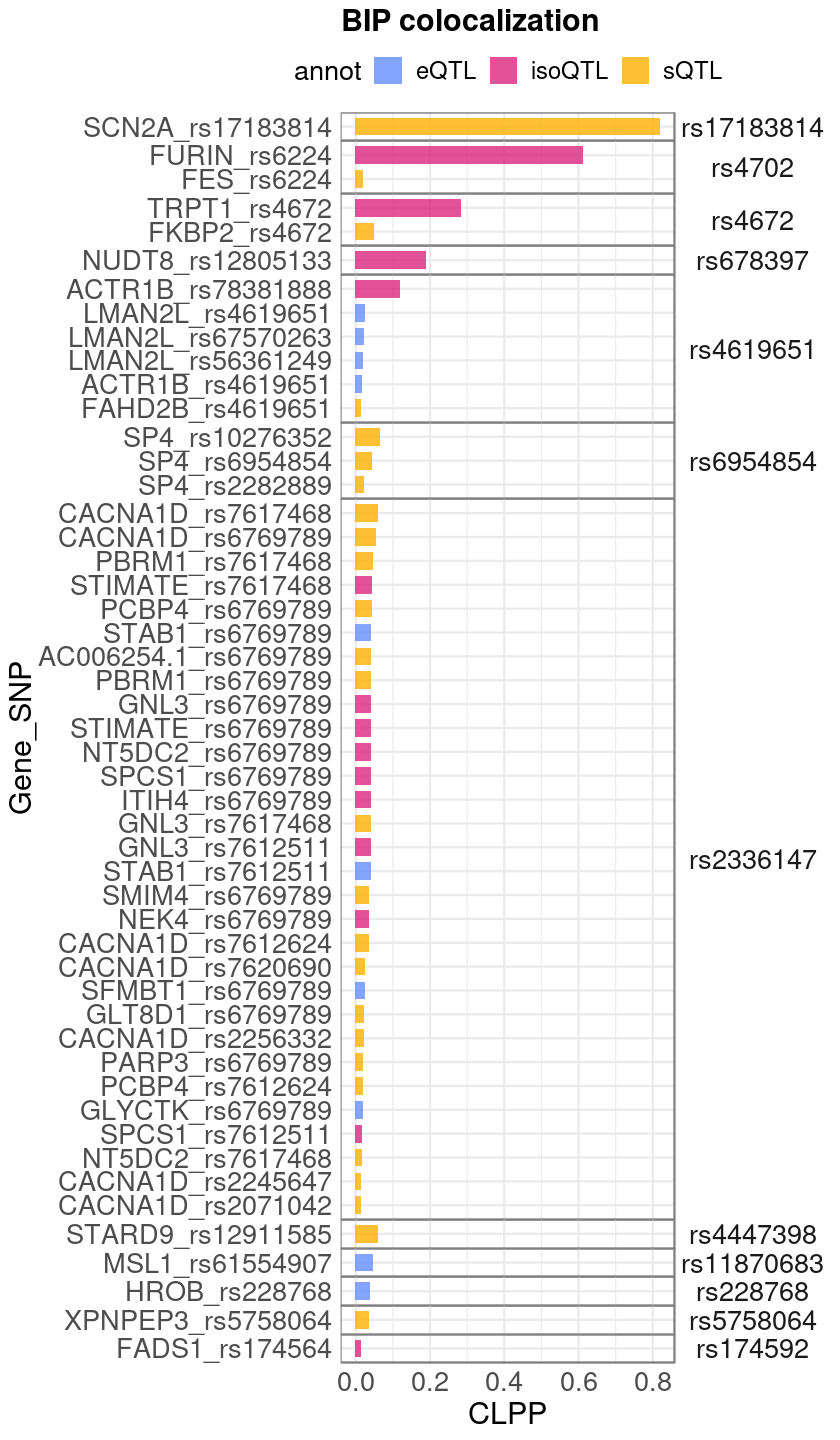

In [14]:
df <- res_subset %>% 
    filter(GWAS == 'pgc-bip2021-all') %>% 
    unite("Gene_SNP", GeneSymbol, SNP_ID, sep = "_", remove = FALSE)
table <- read.table("~/project-gandalm/GWAS-coloc/code/pgc-bip2021-all_loci.tsv",header = T)
df <- df %>% inner_join(table, by = "locus")
df <- df %>% arrange(desc(CLPP))
df <- df[!duplicated(df$Gene_SNP),]
df_top50 <- df[1:50,]

df_order <- df_top50 %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)
df_order <- df_order %>% mutate(SNP = factor(SNP, levels = unique(SNP)))
df_order$SNP <- fct_rev(df_order$SNP)
# df_order$Gene_SNP
# df_order$locus
df_order[which(df_order$annot == 'fetal_eqtl'),'annot'] <- 'eQTL'
df_order[which(df_order$annot == 'fetal_isoqtl'),'annot'] <- 'isoQTL'
df_order[which(df_order$annot == 'fetal_sqtl'),'annot'] <- 'sQTL'
options(repr.plot.height = 12, repr.plot.width = 7)
ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = annot)) +
    geom_bar(stat = "identity", alpha = 0.8, width = 0.7) +
    facet_grid(SNP ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "BIP colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA),
         legend.position = "top") +
    scale_fill_manual(values = colors)

In [15]:
ggsave("~/project-gandalm/isoform_twas/colocal/figures/CLPP_BIP_v2.pdf", height = 12, width = 7)

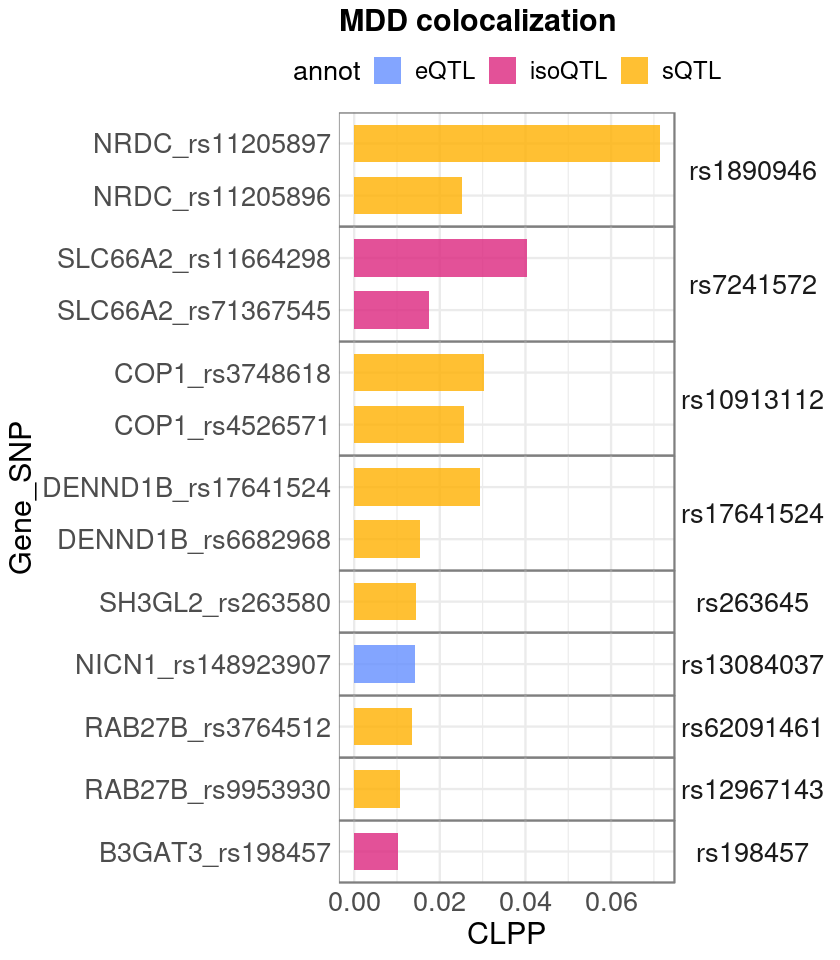

In [7]:
df <- res_subset %>% 
    filter(GWAS == 'MDD.Howard.PGC.2019') %>% 
    unite("Gene_SNP", GeneSymbol, SNP_ID, sep = "_", remove = FALSE)
table <- read.table("~/project-gandalm/GWAS-coloc/code/MDD.Howard.PGC.2019_loci.tsv",header = T)
df <- df %>% inner_join(table, by = "locus")
df <- df %>% arrange(desc(CLPP))
df <- df[!duplicated(df$Gene_SNP),]
# df_top50 <- df[1:50,]
# dim(df)
df_top50 <- df
options(repr.plot.height = 8, repr.plot.width = 7)
df_order <- df_top50 %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)
df_order <- df_order %>% mutate(SNP = factor(SNP, levels = unique(SNP)))
df_order$SNP <- fct_rev(df_order$SNP)
# df_order$Gene_SNP
# df_order$locus
df_order[which(df_order$annot == 'fetal_eqtl'),'annot'] <- 'eQTL'
df_order[which(df_order$annot == 'fetal_isoqtl'),'annot'] <- 'isoQTL'
df_order[which(df_order$annot == 'fetal_sqtl'),'annot'] <- 'sQTL'
ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = annot)) +
    geom_bar(stat = "identity", alpha = 0.8, width = 0.7) +
    facet_grid(SNP ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "MDD colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA),
         legend.position = "top") +
    scale_fill_manual(values = colors)

In [8]:
ggsave("~/project-gandalm/isoform_twas/colocal/figures/CLPP_MDD_v2.pdf", height = 8, width = 7)

In [59]:
df <- res_subset %>% 
    filter(GWAS == 'ASD.iPSYCHPGC.2018')
nrow(df)

[1] 0

In [16]:
df <- res_subset %>% 
    filter(GWAS == 'ADHD.Demontis.2019') %>% 
    unite("Gene_SNP", GeneSymbol, SNP_ID, sep = "_", remove = FALSE)
table <- read.table("~/project-gandalm/GWAS-coloc/code/ADHD.Demontis.2019_loci.tsv",header = T)
df <- df %>% inner_join(table, by = "locus")
df <- df %>% arrange(desc(CLPP))
df <- df[!duplicated(df$Gene_SNP),]
# df

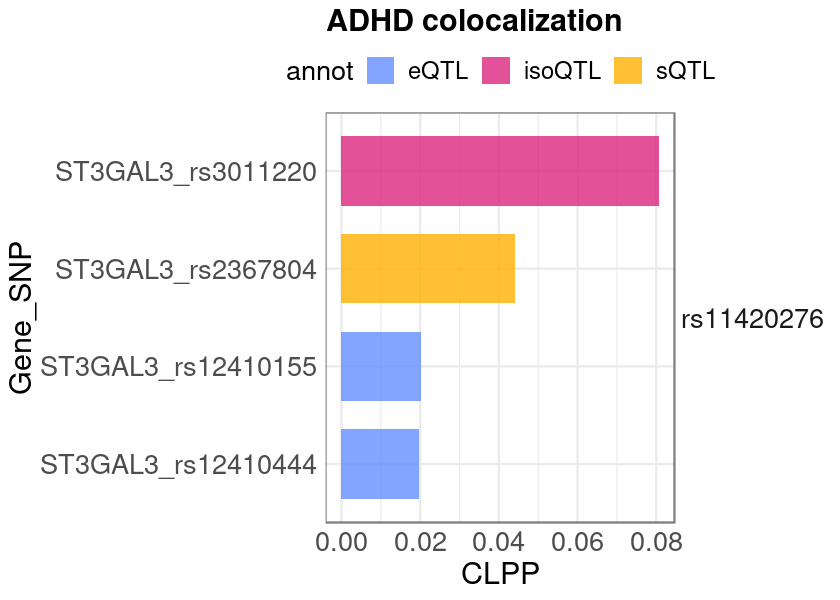

In [17]:
options(repr.plot.height = 5, repr.plot.width = 7)
df_top50 <- df

df_order <- df_top50 %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)
df_order <- df_order %>% mutate(SNP = factor(SNP, levels = unique(SNP)))
df_order$SNP <- fct_rev(df_order$SNP)
# df_order$Gene_SNP
# df_order$locus
df_order[which(df_order$annot == 'fetal_eqtl'),'annot'] <- 'eQTL'
df_order[which(df_order$annot == 'fetal_isoqtl'),'annot'] <- 'isoQTL'
df_order[which(df_order$annot == 'fetal_sqtl'),'annot'] <- 'sQTL'
ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = annot)) +
    geom_bar(stat = "identity", alpha = 0.8, width = 0.7) +
    facet_grid(SNP ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "ADHD colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA),
          legend.position = "top") +
    scale_fill_manual(values = colors)

In [18]:
ggsave("~/project-gandalm/isoform_twas/colocal/figures/CLPP_ADHD_v2.pdf", height = 5, width = 7)